# KNN 

Lets understand at high level. KNN is one of the supervised Machine Learning  algorithms , that can be used for .




1- Regression - If you look into Linear Regression only for regression purpose.



2- Classification - If you look into Logistic Regression we can use only for the classification.




But when it comes to KNN . I can use KNN Algorithms for regression problem as well as classification problem.




Most of the time it was use for solving Classification Problem.







Q-What is K-Nearest Neighbors ?





Ans- K-Nearest Neighbors (KNN) is a type of supervised machine learning algorithm which is used for both regression and classification purpose . but mostly it is used for later, Given a dataset with different classes , KNN tries to predict the correct class  of test data by calculating at the distance between the test data and all the training points .It then selects the  K points which are closet to the test data once the points are selected , the algorithms calculates the probablity (in case of classification) of the test point belonging to the class of K training Points and the class with the highest probablity is selected in this case of a regreesion problem. The prediced value is the mean of the K select training points.





# Lets UnderStand this with an illustration.

1-  Given a training dataset as given below . we have new test data that we need to assign to one of the two classes.




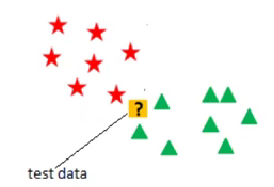


2 - Now , The  K-NN algorithm calculates the distance between the test data and the given training data.





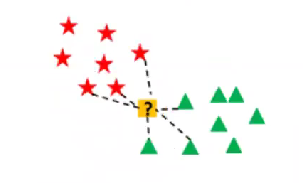

3- After claculating the distance . it will select the K training Points which are nearest to test data. Lets assume the values of K is 3 for our example.



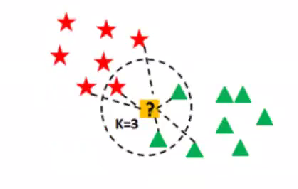

4- Now, 3 nearest neighbors are selected , as show in the figure above , Lets see in which class our test data will be assigned.



Number of Green class values = 2 



Numbers of Red Class Values  = 1


(Probablity Green)= 2/3




(Probablity Red)= 1/3





Since the probablity for Green class is higher than Red , The KNN algorithms will assign the test data to Green class.





Similarly if this were the case of a regression problem . The predicted value for the test data will simply be the mean of all the 3 nearest values.





This is the basic working algorithms for KNN. Lets understand how the distance is calculated.









#  Euclidean Distance 





It is the most commonly used to method to claculate the distance between two points the  Eucliden distance between two points 'p(p1,p2)' and 'q(q1,q2)' is calculated as :



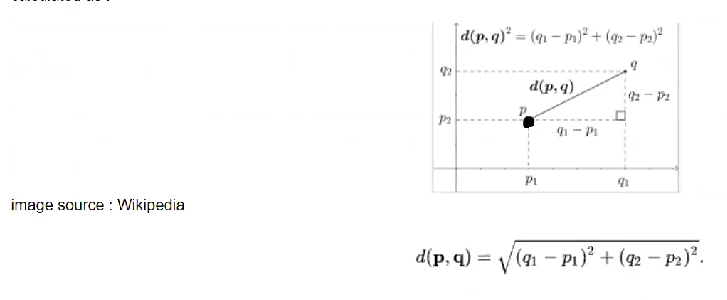






Similarly for n-dimensional space the Eulidean Distance is given as .


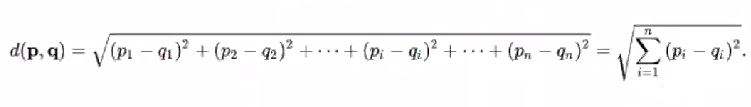

# Lazy Learner (KNN is also called Lazy Learner)





KNN, Why so i learn your data  , you give me data for learn to train . it will not train . it will train only when i tell KNN to predict (x_test) then this guy go back and train , then comes back and test then predict you data ( You got the idea . what i am talking)








K-NN , algorithms are often termed  as lazy learners . Lets understand why is that most of the algorithms like bayesian classification logistic regression, SVM etc . are called Eager  learner these algorithms generalize over the training set before receiving the test data i.e ther create model based on the training data before receiving the test data and then do the prediction / classification on the test data . But this is  not the case with KNN algorithms it does'nt create  a generalizer model for the training  set but waits for the test data . once test data is provided then only it starts generalizing the training data to classify the test data . So a lazy learner just stores  is the training  data and waist  for the test set . such algorithms work less while training  and more while classifying a test dataset.

#  PROS and CONS of K-NN Algorithms



             We will Study later

# Python implemantation

In [1]:
#import necessory libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


# For Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


#Import Plotly


import warnings
warnings.filterwarnings('ignore')

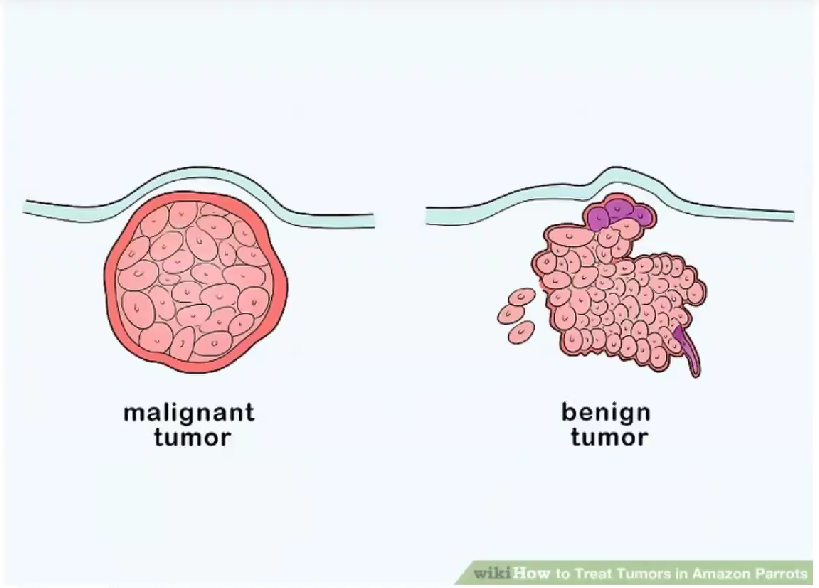

In [2]:
#Get the csv data here and print head.

data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Print Summary
print('Shape ------->  ',data.shape)
print('Each Column and data type and its count')
print(data.info())

Shape ------->   (569, 32)
Each Column and data type and its count
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perime

 If the database is float . then 99% times its continious data.

In [4]:
#Drop Alert 1 : unnamed :32 column has all null. safe to remove the column

data=data.drop(['Unnamed: 32'],axis=1)

In [5]:
#DataFrame Statistics 
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Seems no other cols have null . its safe to proceed 
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Dataset is not imbalanced , we are go to proceed .



imbalanced dataset - To much different between B and M .Balance dataset doesnot mean 50/50.

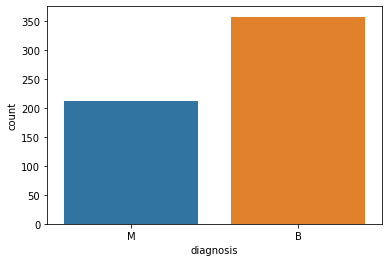

In [8]:
#Plot each class Frequency
sns.countplot(x='diagnosis',data=data)
plt.show()

In [9]:
data.shape

(569, 31)

# Using SelectKBest Feature Selection method ..



Select Kbest use f_classification to find best feature , where f_classif use ANOVA Test.

In [10]:
from sklearn.feature_selection import SelectKBest,f_classif

In [11]:
#Replace Label and column (Diagnosis) into binary codes
data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0})

All Machine learning algorithms they dont unbderstand alphabets they only understand numbers.


In [12]:
x=data.drop('diagnosis',axis=1)
y=data.diagnosis

In [13]:
best_features=SelectKBest(score_func=f_classif,k=17)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

#Concatinate DataFrames

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score'] #Name output Columns

print(feature_scores.nlargest(17,'Score'))#Print 17 best Feature

            Feature_Name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


#  Model Building 

In [14]:
new_x=data[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]

In [15]:
scaler=StandardScaler()

In [16]:
x_scaler=scaler.fit_transform(new_x)

In [17]:
#Building model to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=355)

In [18]:
#Write one function and call as many as times to check accuracy_score of different models.

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n============Train Result=============")
        print(f"Accuracy Score :{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train ==False :
        pred=clf.predict(x_test)
        print("\n ============Test Result==============")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)* 100:.2f}%")
        
        
        print('\n \n Classification Report \n ',classification_report(y_test,pred,digits=2))#model confidence/accuracy

In [19]:
#Initiate Kneighnors Classifier
knn=KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
#Call the function and pass dataset to check train and test score

metric_score(knn,x_train,x_test,y_train,y_test,train=True)# This is for training score


metric_score(knn,x_train,x_test,y_train,y_test,train=False)#This is for testing Score


============Train Result=============
Accuracy Score :98.83%

 ============Test Result==============
Accuracy Score : 95.80%

 
 Classification Report 
                precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
#Student of DataScience
#Student of DataTrained-Saurav
#Date- 05-09-2022
#Time- 11:10